In [3]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training data
DATA_DIR = '../data'

train_df = pd.read_csv(os.path.join(DATA_DIR, 'train.csv'))
print("First 5 rows of the training data:")
display(train_df.head())
print(f"Shape of the dataset: {train_df.shape}")

First 5 rows of the training data:


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


Shape of the dataset: (159571, 8)


TARGET COLUMNS

In [4]:
TARGET_COLUMNS = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

Check for null values

In [5]:
print("\nNull values check:")
print(train_df.isnull().sum())
print("\nUnique values check:")
print(train_df.nunique())


Null values check:
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

Unique values check:
id               159571
comment_text     159571
toxic                 2
severe_toxic          2
obscene               2
threat                2
insult                2
identity_hate         2
dtype: int64


Target distribution

Target Label Distribution:


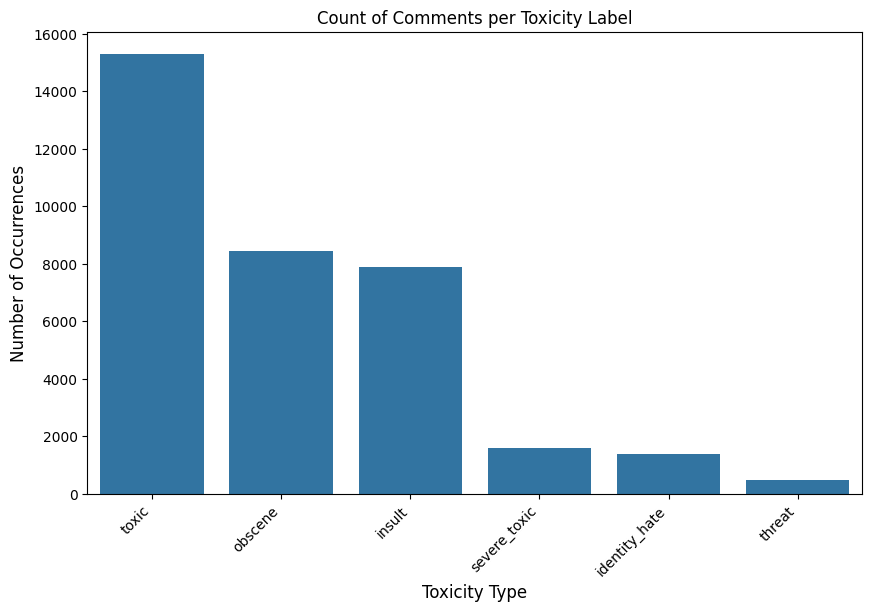

In [6]:
print("Target Label Distribution:")
label_counts = train_df[TARGET_COLUMNS].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Count of Comments per Toxicity Label')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Toxicity Type', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

Calculate the ratio of comments with AT LEAST one toxic label

In [7]:
total_toxic_comments = train_df[TARGET_COLUMNS].any(axis=1).sum()
print(f"Total comments with at least one toxic label: {total_toxic_comments} ({total_toxic_comments/len(train_df)*100:.2f}%)")

Total comments with at least one toxic label: 16225 (10.17%)


Comment Length Analysis

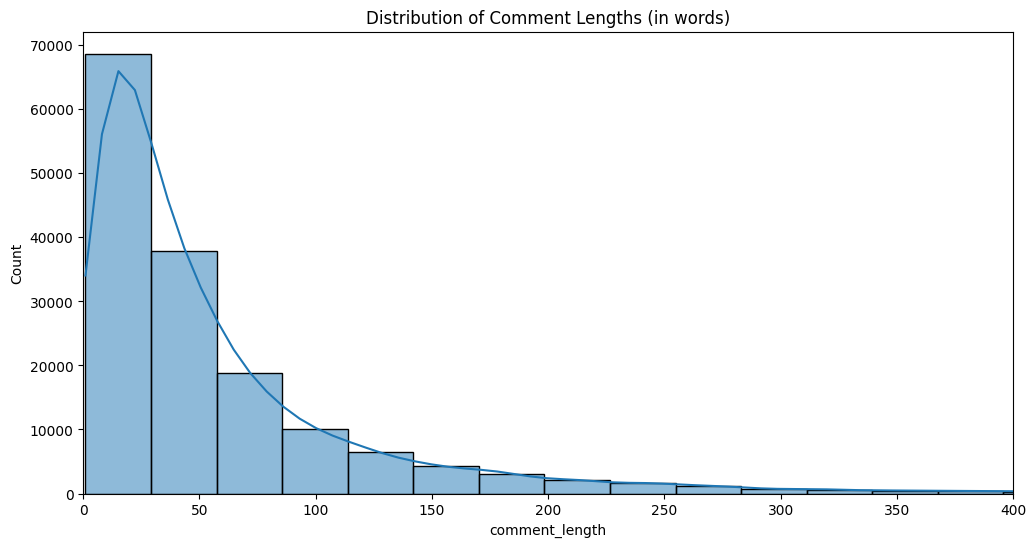

Average comment length: 67.27 words
95th percentile length: 230.0 words


In [8]:
train_df['comment_length'] = train_df['comment_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12, 6))
sns.histplot(train_df['comment_length'], bins=50, kde=True)
plt.title('Distribution of Comment Lengths (in words)')
plt.xlim(0, 400) # Limit x-axis for better visualization
plt.show()

print(f"Average comment length: {train_df['comment_length'].mean():.2f} words")
print(f"95th percentile length: {train_df['comment_length'].quantile(0.95)} words")

Sample Toxic Comments

In [9]:
print("\n--- Sample Toxic Comments (Identity Hate) ---")
display(train_df[train_df['identity_hate'] == 1]['comment_text'].sample(n=3).tolist())


--- Sample Toxic Comments (Identity Hate) ---


['Ekgograf and his son of bitch of gang of dumb, n*zi , and are the greatest batard that ever walk on earth !!!!!',
 'Regents licks a taintOPENLYGAY',
 "Albanians are terrorists \n\nI know that all albanians (with little a) are terrorists. Since they burned 300 churches, supported terrorist, can't let Serbs live on their land (Serbian Kosovo), slaughtered and burned Serbian children allive (Serbian babies Sava from Prizren in 1999. and Marija from Gnjilane in 1998.), destroyed Serbian cemeteries etc. All albanians are terrorists, devil's nation that have no history, culture (look at their flag)."]

Sample Clean Comments

In [10]:
print("\n--- Sample Clean Comments ---")
display(train_df[train_df[TARGET_COLUMNS].sum(axis=1) == 0]['comment_text'].sample(n=3).tolist())


--- Sample Clean Comments ---


['In the meantime, please do no edit the article Ramapo College until an administrator has resolved the copyright issue.',
 "Why? Their not heavy metal. Can't you just accept that? 69.250.142.218",
 'With the list currently being so short I would leave it without restrictions at this point. I would definitely include leagues lower than the AHL in a number of cases such as junior or ECHL or any of the euro leagues. -']

Data preprocessing and splitting

In [11]:
from sklearn.model_selection import train_test_split

# Drop the temporary length column
train_df = train_df.drop(columns=['comment_length'])

# 3.1. Basic Text Cleaning (Optional for Transformers, but can help)
import re
def clean_text(text):
    text = text.lower() # Convert to lowercase
    text = re.sub(r'[^a-z0-9\s]', '', text) # Remove punctuation and symbols (keep letters, numbers, spaces)
    return text

Apply cleaning

In [12]:
train_df['comment_text'] = train_df['comment_text'].apply(clean_text)

In [13]:
X = train_df['comment_text'].values
y = train_df[TARGET_COLUMNS].values # Multi-label targets as a NumPy array

print(f"X shape: {X.shape}")
print(f"Y shape: {y.shape}")
print("Example of labels for a single comment:", y[0])

X shape: (159571,)
Y shape: (159571, 6)
Example of labels for a single comment: [0 0 0 0 0 0]


Train-Test Split

In [14]:
# 3.3. Train-Validation Split
# Stratifying on multi-label data is complex. We use a simple split here.
RANDOM_SEED = 42
TRAIN_SIZE = 0.9

X_train, X_val, y_train, y_val = train_test_split(
    X, 
    y, 
    test_size=(1-TRAIN_SIZE), 
    random_state=RANDOM_SEED,
    shuffle=True
)

print("-" * 30)
print(f"Training set size: {len(X_train)} comments")
print(f"Validation set size: {len(X_val)} comments")

# Save the split data for the next notebook
# (While we'll use the arrays directly, saving ensures clean data transfer)
np.save(os.path.join(DATA_DIR, 'X_train.npy'), X_train)
np.save(os.path.join(DATA_DIR, 'X_val.npy'), X_val)
np.save(os.path.join(DATA_DIR, 'y_train.npy'), y_train)
np.save(os.path.join(DATA_DIR, 'y_val.npy'), y_val)

print("Preprocessing complete. Data arrays saved for training notebook.")

------------------------------
Training set size: 143613 comments
Validation set size: 15958 comments
Preprocessing complete. Data arrays saved for training notebook.
